In [1]:
import json
from datetime import datetime

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Plotting with Matplotlib

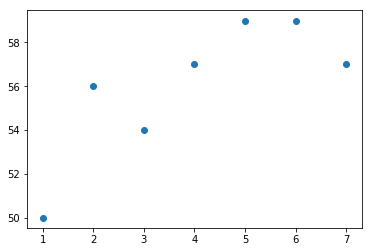

In [2]:
simple_x = [1, 2, 3, 4, 5, 6, 7]
simple_y = [50, 56, 54, 57, 59, 59, 57]

plt.scatter(simple_x, simple_y)

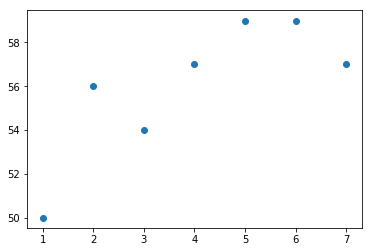

In [3]:
# If we have a list of tuples containing points
simple_data = [(1, 50), (2, 56), (3, 54), (4, 57), (5, 59), (6, 59), (7, 57)]

# We can use something like this to unpack the data:
plt.scatter(*zip(*simple_data))

## Matplotlib Annotations

In [4]:
# Matplotlib with Annotations

# Source: https://www.basketball-reference.com/

cleveland_seasons = [
    ('00/01', 0.366),
    ('01/02', 0.354),
    ('02/03', 0.207),
    ('03/04', 0.427), # LeBron's rookie year
    ('04/05', 0.512),
    ('05/06', 0.610),
    ('06/07', 0.610),
    ('07/08', 0.549),
    ('08/09', 0.805),
    ('09/10', 0.744),
    ('10/11', 0.232), # LeBron leaves for Miami
    ('11/12', 0.318),
    ('12/13', 0.293),
    ('13/14', 0.402),
    ('14/15', 0.646), # LeBron returns to Cleveland
    ('15/16', 0.695),
    ('16/17', 0.622),
    ('17/18', 0.610)
]

year, win_percentage = zip(*cleveland_seasons)

win_percentage

(0.366,
 0.354,
 0.207,
 0.427,
 0.512,
 0.61,
 0.61,
 0.549,
 0.805,
 0.744,
 0.232,
 0.318,
 0.293,
 0.402,
 0.646,
 0.695,
 0.622,
 0.61)

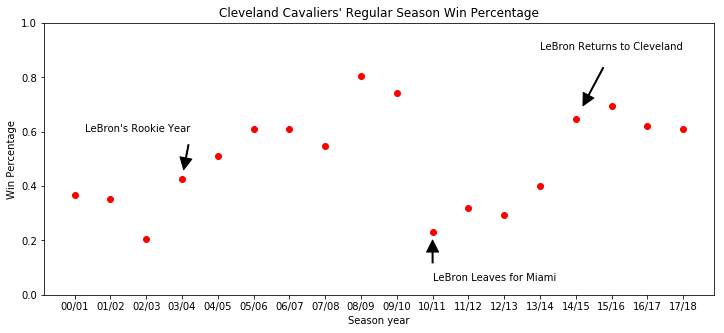

In [5]:
# start with a base figure
fig = plt.figure(figsize=(12, 5))

# Add an Axes to the figure
ax = fig.add_subplot(111)

# Set Limits for the max value of the y-axis
ax.set_ylim(ymax=1)

ax.set_xlabel('Season year')
ax.set_ylabel('Win Percentage')
ax.set_title("Cleveland Cavaliers' Regular Season Win Percentage")

# Add annotations at specific places in the graph
ax.annotate("LeBron's Rookie Year", xy=('03/04', 0.427), xytext=(.3, .6),
arrowprops=dict(facecolor='black', shrink=0.2, width=1),
)
ax.annotate("LeBron Leaves for Miami", xy=('10/11', 0.232), xytext=('10/11', 0.05),
    arrowprops=dict(facecolor='black', shrink=0.2, width=1),
)
ax.annotate("LeBron Returns to Cleveland", xy=('14/15', 0.646), xytext=('13/14', .9),
    arrowprops=dict(facecolor='black', shrink=0.2, width=1),
)

# Specify how you'd like the dots on the graph to appear
# ro stands for red circles
ax.plot(year, win_percentage, 'ro')


## Pandas

The primary data structures in pandas are implemented as two classes:

- DataFrame: has rows and named columns, like a table
- Series: a single column. A DataFrame contains one or more Series and a name for each Series.

In [6]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [7]:
# Pandas can create a dataframe straight from a CSV file
# This data comes from the Charlottesville Open Data Portal
city_trails_data = 'https://raw.githubusercontent.com/erinspace/wids_dataviz/master/city_trails.csv'

trails_df = pd.read_csv(city_trails_data)

In [8]:
# Look at the first few rows of the DataFrame
trails_df.head()

,OBJECTID,NAME,TYPE,STATUS,EASEMENT,PROPERTY_OWNER
0,28,Emmet Street,Shared Use Path,Proposed,In discussion,UVA/ROW
1,261,Coal Tower,Shared Use Path,Existing,Proffer,Red Light
2,264,Buford SRTS - Cherry Avenue,Soft Surface,Proposed,In discussion,City School Board
3,265,Buford Nature Trail,Soft Surface,Existing,Complete,City School Board
4,250,Buford Nature Trail,Soft Surface,Existing,Complete,City School Board


In [9]:
trails_df.tail()

,OBJECTID,NAME,TYPE,STATUS,EASEMENT,PROPERTY_OWNER
403,3068,NaN,Shared Use Path,Existing,NaN,NaN
404,3069,NaN,Shared Use Path,Existing,NaN,NaN
405,3070,NaN,Shared Use Path,Existing,NaN,NaN
406,3071,NaN,Shared Use Path,Existing,NaN,NaN
407,3072,NaN,Shared Use Path,Existing,NaN,NaN


In [10]:
# Or, the whole thing! With a few cut out in the middle
trails_df

,OBJECTID,NAME,TYPE,STATUS,EASEMENT,PROPERTY_OWNER
0,28,Emmet Street,Shared Use Path,Proposed,In discussion,UVA/ROW
1,261,Coal Tower,Shared Use Path,Existing,Proffer,Red Light
2,264,Buford SRTS - Cherry Avenue,Soft Surface,Proposed,In discussion,City School Board
3,265,Buford Nature Trail,Soft Surface,Existing,Complete,City School Board
4,250,Buford Nature Trail,Soft Surface,Existing,Complete,City School Board
5,222,Buford Nature Trail,Soft Surface,Existing,Complete,City School Board
6,266,Greenbrier Entry Path,Shared Use Path,Existing,Complete,City
7,267,Greenbrier Entry Path,Shared Use Path,Existing,Complete,City
8,287,Rivanna River Trail,Shared Use Path,Existing,Complete,Riverview Cemetery Co.
9,294,Rivanna River Trail,Shared Use Path,Existing,Complete,Luck Development Partners


In [11]:
# Show the number of rows and columns
trails_df.shape

(408, 6)

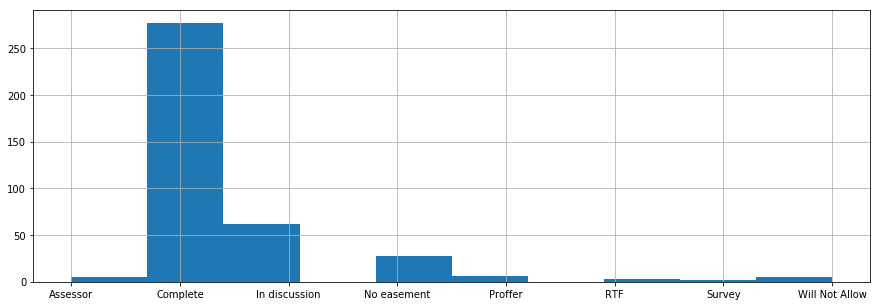

In [12]:
# Just select one column of the dataframe to focus on
easement_data = trails_df['EASEMENT']

# figsize is the size in inches of the figure to create
easement_data.hist(figsize=(15, 5))


In [13]:
# Use describe to get some interesting metrics about the dataset
easement_data.describe()

count          388
unique           8
top       Complete
freq           277
Name: EASEMENT, dtype: object

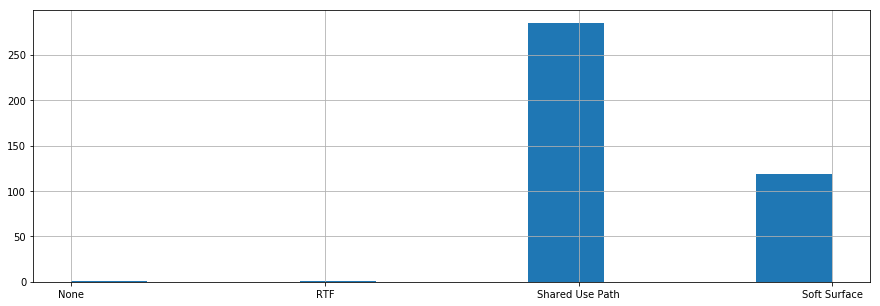

In [14]:
trail_type_df = trails_df['TYPE']

trail_type_df.hist(figsize=(15, 5))

In [15]:
# Faculty earlings from a Plotly example dataset - load from a CSV
# More on how to do this later!
school_earnings_raw_url = 'https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv'
school_earnings = pd.read_csv(school_earnings_raw_url)

# Get summary stats about the dataset
school_earnings.describe()

,Women,Men,Gap
count,21.000000,21.000000,21.000000
mean,81.095238,113.523810,32.428571
std,12.813683,25.705289,14.137084
min,62.000000,78.000000,9.000000
25%,72.000000,92.000000,22.000000
50%,79.000000,114.000000,31.000000
75%,92.000000,131.000000,40.000000
max,112.000000,165.000000,58.000000


In [16]:
parking_tickets = pd.read_csv('https://raw.githubusercontent.com/erinspace/wids_dataviz/master/parking_tickets.csv')

parking_tickets.head()

,Unnamed: 0,RecordID,TicketNumber,DateIssued,StreetName,TimeIssued,StreetNumber,LicenseState,WaiverRequestDate,WaiverGrantedDate,AppealDate,AppealGrantedDate,ViolationDescription,AppealStatus,Location,LicensePlateAnon,WaiverStatus,NewDateIssued
0,0,1,69692,2015-10-30T04:00:00.000Z,W WATER ST,9:58,100,NJ,NaN,NaN,NaN,NaN,No Parking any time,NaN,100 W WATER ST,19959,NaN,2015-10-30 04:00:00
1,1,2,19015 6,2013-04-13T04:00:00.000Z,ALTAMONT ST,9:42,402,VA,NaN,NaN,NaN,NaN,Permit Zone w/o Permit,NaN,402 ALTAMONT ST,40480,NaN,2013-04-13 04:00:00
2,2,3,1902115,2013-05-25T04:00:00.000Z,PARK ST,8:03,435,DC,NaN,NaN,NaN,NaN,Parking 20ft of Intersection,NaN,435 PARK ST,3400,NaN,2013-05-25 04:00:00
3,3,4,3343501,2013-04-26T04:00:00.000Z,WATER ST LOT,16:21,100,VA,NaN,NaN,NaN,NaN,Violation of Meter Ordinance,NaN,100 WATER ST LOT,130207,NaN,2013-04-26 04:00:00
4,4,5,3343601,2013-04-26T04:00:00.000Z,WATER ST LOT,16:24,100,VA,NaN,NaN,NaN,NaN,Violation of Meter Ordinance,NaN,100 WATER ST LOT,72508,NaN,2013-04-26 04:00:00


In [17]:
parking_tickets.shape

(5000, 18)

In [18]:
len(parking_tickets)

5000

# Data parsing -- dates and datetimes

Dates and datetimes are a big place where you have to use extra care when reading data. 

Date - Just a Month, day and year.

Datetime - A month, day, year, and time. 

In [19]:
# let's look at the first date issued
first_datetime = parking_tickets['DateIssued'][0]

first_datetime

'2015-10-30T04:00:00.000Z'

In [20]:
# Figure out how to parse this into a datetime
datetime.strptime(first_datetime, '%Y-%m-%dT%H:%M:%S.%fZ')

datetime.datetime(2015, 10, 30, 4, 0)

In [21]:
# apply this to every entry in this column
# df['a'] = df['a'].apply(lambda x: x + 1)

In [22]:
parking_tickets['NewDateIssued'] = parking_tickets['DateIssued'].apply(
    lambda x: datetime.strptime(x,  '%Y-%m-%dT%H:%M:%S.%fZ')
)

In [23]:
parking_tickets['DateIssued'][0]

'2015-10-30T04:00:00.000Z'

In [24]:
parking_tickets['NewDateIssued'][0]

Timestamp('2015-10-30 04:00:00')

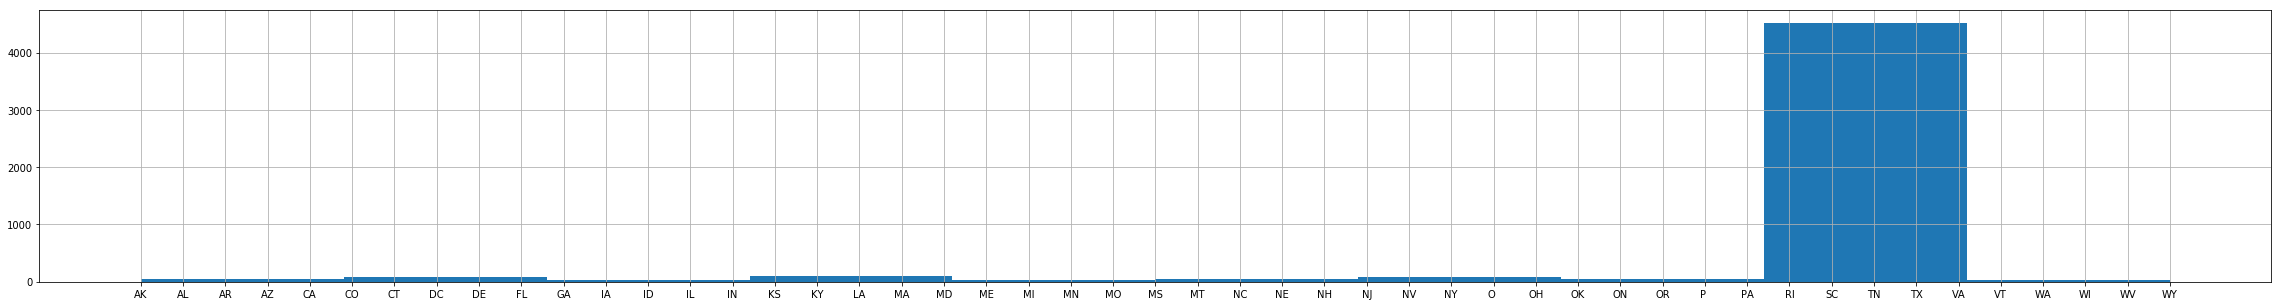

In [25]:
parking_tickets['LicenseState'].hist(figsize=(40, 5))

## Data Parsing

Filter out missing data and narrow to the data you'd like to examine

Sometimes we want to focus on data that exists in a dataset rather than include "NA" or missing values.

In [26]:
appeals = parking_tickets['AppealStatus'].notna()
tickets_with_appeals = parking_tickets[appeals]

tickets_with_appeals.head()

,Unnamed: 0,RecordID,TicketNumber,DateIssued,StreetName,TimeIssued,StreetNumber,LicenseState,WaiverRequestDate,WaiverGrantedDate,AppealDate,AppealGrantedDate,ViolationDescription,AppealStatus,Location,LicensePlateAnon,WaiverStatus,NewDateIssued
5,5,6,3360718,2013-04-26T04:00:00.000Z,E JEFFERSON ST,17:17,100,VA,NaN,NaN,05/08/2013,05/08/2013,No Parking any time,granted,100 E JEFFERSON ST,126011,NaN,2013-04-26 04:00:00
9,9,10,5702618,2013-04-27T04:00:00.000Z,5TH ST EXT SW,13:35,112,VA,NaN,NaN,05/16/2013,05/16/2013,No Parking any time,granted,112 5TH ST EXT SW,106274,NaN,2013-04-27 04:00:00
13,13,14,6434416,2015-10-30T04:00:00.000Z,WAYSIDE PL,17:01,1800,VA,NaN,NaN,11/24/2015,11/24/2015,Permit Zone w/o Permit,granted,1800 WAYSIDE PL,122063,NaN,2015-10-30 04:00:00
14,14,15,6434516,2015-10-30T04:00:00.000Z,WAYSIDE PL,17:04,1800,VA,NaN,NaN,11/10/2015,11/10/2015,Permit Zone w/o Permit,granted,1800 WAYSIDE PL,124381,NaN,2015-10-30 04:00:00
15,15,16,6465622,2013-09-28T04:00:00.000Z,E JEFFERSON ST,11:42,400,VA,NaN,NaN,10/04/2013,10/04/2013,Handicapped Space,granted,400 E JEFFERSON ST,127652,NaN,2013-09-28 04:00:00


In [27]:
tickets_with_appeals.shape

(326, 18)

In [28]:
# Know what's in your data -- see all the different posibilities for appeal type
tickets_with_appeals.AppealStatus.unique()

array(['granted', 'denied', 'pending'], dtype=object)

In [29]:
# Create a new dataframe whose appeals aren't pending
finished_appeal_values = tickets_with_appeals['AppealStatus'] != 'pending'

finished_appeals = tickets_with_appeals[finished_appeal_values]

finished_appeals.head()

,Unnamed: 0,RecordID,TicketNumber,DateIssued,StreetName,TimeIssued,StreetNumber,LicenseState,WaiverRequestDate,WaiverGrantedDate,AppealDate,AppealGrantedDate,ViolationDescription,AppealStatus,Location,LicensePlateAnon,WaiverStatus,NewDateIssued
5,5,6,3360718,2013-04-26T04:00:00.000Z,E JEFFERSON ST,17:17,100,VA,NaN,NaN,05/08/2013,05/08/2013,No Parking any time,granted,100 E JEFFERSON ST,126011,NaN,2013-04-26 04:00:00
9,9,10,5702618,2013-04-27T04:00:00.000Z,5TH ST EXT SW,13:35,112,VA,NaN,NaN,05/16/2013,05/16/2013,No Parking any time,granted,112 5TH ST EXT SW,106274,NaN,2013-04-27 04:00:00
13,13,14,6434416,2015-10-30T04:00:00.000Z,WAYSIDE PL,17:01,1800,VA,NaN,NaN,11/24/2015,11/24/2015,Permit Zone w/o Permit,granted,1800 WAYSIDE PL,122063,NaN,2015-10-30 04:00:00
14,14,15,6434516,2015-10-30T04:00:00.000Z,WAYSIDE PL,17:04,1800,VA,NaN,NaN,11/10/2015,11/10/2015,Permit Zone w/o Permit,granted,1800 WAYSIDE PL,124381,NaN,2015-10-30 04:00:00
15,15,16,6465622,2013-09-28T04:00:00.000Z,E JEFFERSON ST,11:42,400,VA,NaN,NaN,10/04/2013,10/04/2013,Handicapped Space,granted,400 E JEFFERSON ST,127652,NaN,2013-09-28 04:00:00


In [30]:
finished_appeals.shape

(320, 18)

In [31]:
# Sanity checks are also great!
finished_appeals.AppealStatus.unique()

array(['granted', 'denied'], dtype=object)

In [32]:
# Narrow down your dataframe to just the columns you're interested in
selected_data = finished_appeals[['LicenseState', 'TimeIssued', 'ViolationDescription', 'AppealStatus']]
selected_data.head()

,LicenseState,TimeIssued,ViolationDescription,AppealStatus
5,VA,17:17,No Parking any time,granted
9,VA,13:35,No Parking any time,granted
13,VA,17:01,Permit Zone w/o Permit,granted
14,VA,17:04,Permit Zone w/o Permit,granted
15,VA,11:42,Handicapped Space,granted


In [33]:
# See Unique values in ViolationDescription

selected_data['ViolationDescription'].unique()


array(['No Parking any time', 'Permit Zone w/o Permit',
       'Handicapped Space', 'Overtime Parking', 'Overtime Parking ',
       'No Parking Desig HR', 'No City License', 'Obstructing Traffic',
       'Blocking Drive', 'Parking on Sidewalk',
       'Violation of Meter Ordinance',
       'Parking on Sidewalk/Blocking Sidewalk', 'Other', 'Loading Zone',
       'Prohibited Zone', '12 Inches From Curb', 'LT Side to Curb',
       '15ft of Fire Hydrant', 'No Parking Desig HR ',
       'Parking 20ft of Intersection', 'Occupying Adjoining Space',
       'Curb Painted Yellow', 'Void', 'Obstructing Traffic ',
       'Blocking Drive '], dtype=object)

In [34]:
# See how many of each there are
parking_tickets['ViolationDescription'].value_counts()


Overtime Parking                         2405
Permit Zone w/o Permit                    729
Violation of Meter Ordinance              421
No Parking any time                       322
Void                                      278
Curb Painted Yellow                       137
LT Side to Curb                            79
No City License                            77
Handicapped Space                          73
Parking 20ft of Intersection               66
Loading Zone                               60
No Parking Desig HR                        54
15ft of Fire Hydrant                       52
Warning                                    43
12 Inches From Curb                        32
Parking on Sidewalk/Blocking Sidewalk      30
Other                                      29
No Parking Desig HR                        27
Occupying Adjoining Space                  24
Parking on Sidewalk                        16
Blocking Drive                             12
Prohibited Zone                   

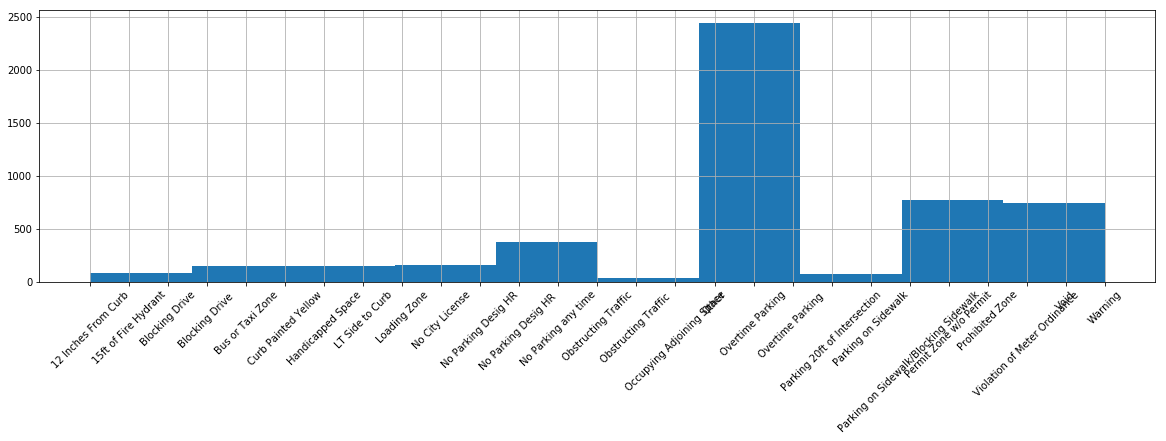

In [35]:
parking_tickets['ViolationDescription'].hist(figsize=(20, 5), xrot=45)


# JSON Data parsing

We have some climate data in JSON format, which we can pretty easilly get into python dictionary, with the key as the year and the value as the temperature difference. 

## "yearly average temperature anomalies"

[source](https://www.climate.gov/maps-data/dataset/global-temperature-anomalies-graphing-tool)

>Comparing the average temperature of land and ocean combined for a year period to the average temperature for the same period over the 20th century shows if conditions are warmer or cooler than the past.

In [36]:
# Climate data from https://www.ncdc.noaa.gov/cag/

response = requests.get('https://raw.githubusercontent.com/erinspace/wids_dataviz/master/global_temp_anomalies.json')
climate_json = response.json()

# Uncomment lines below to load from file instead
# with open('global_temp_anomalies.json', 'r') as data_file:    
#     climate_json = json.load(data_file)
    

print(json.dumps(climate_json, indent=4))


{
    "description": {
        "title": "Global Land and Ocean Temperature Anomalies, January-December",
        "units": "Degrees Celsius",
        "base_period": "1901-2000",
        "missing": -999
    },
    "data": {
        "1880": "-0.12",
        "1881": "-0.07",
        "1882": "-0.07",
        "1883": "-0.15",
        "1884": "-0.21",
        "1885": "-0.22",
        "1886": "-0.21",
        "1887": "-0.25",
        "1888": "-0.15",
        "1889": "-0.10",
        "1890": "-0.33",
        "1891": "-0.25",
        "1892": "-0.30",
        "1893": "-0.31",
        "1894": "-0.28",
        "1895": "-0.22",
        "1896": "-0.09",
        "1897": "-0.12",
        "1898": "-0.26",
        "1899": "-0.12",
        "1900": "-0.07",
        "1901": "-0.14",
        "1902": "-0.25",
        "1903": "-0.34",
        "1904": "-0.42",
        "1905": "-0.29",
        "1906": "-0.22",
        "1907": "-0.37",
        "1908": "-0.44",
        "1909": "-0.43",
        "1910": "-0.38",
   

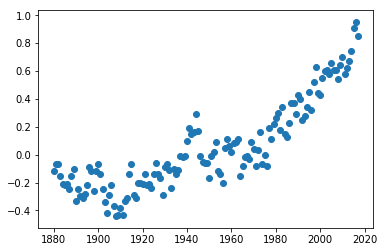

In [37]:
years = [int(year) for year in climate_json['data'].keys()]
temp_anomolies = [float(temp_anomaly) for temp_anomaly in climate_json['data'].values()]

plt.scatter(years, temp_anomolies)


## By far, the best way to learn is to pick a problem YOU have or something you are personally curious about and try to solve it. 

Jolene did just that with some location data! 

Take it away Jolene!

## Find New Data Sources!

There are lots of places around the web to pull in CSVs or JSON of raw data, and try to do some simple visualizations. 

Here's a place to get started:
https://github.com/plotly/datasets

1. Scroll through the example datasets on this public github repo
2. Click on a CSV file. For example: https://github.com/plotly/datasets/blob/master/school_earnings.csv
3. Click "raw"
4. Copy the raw data URL: https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv
5. Open the CSV in a pandas dataframe

In [38]:
# Example. Make your own!
school_earnings_raw_url = 'https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv'

school_earnings = pd.read_csv(school_earnings_raw_url)

school_earnings

,School,Women,Men,Gap
0,MIT,94,152,58
1,Stanford,96,151,55
2,Harvard,112,165,53
3,U.Penn,92,141,49
4,Princeton,90,137,47
5,Chicago,78,118,40
6,Georgetown,94,131,37
7,Tufts,76,112,36
8,Yale,79,114,35
9,Columbia,86,119,33


In [39]:
# Your code here!

In [40]:
# Bokeh Imports

import time

from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.models import HoverTool
from bokeh.plotting import figure 


# This call should happen early on in your code
output_notebook()
# Uncomment the line below to output to a a static HTML file instead
# output_file("lines.html")

Loading BokehJS ...

In [41]:
# Example from Bokeh's getting started guide
# https://bokeh.pydata.org/en/latest/docs/user_guide/quickstart.html

# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend="Temp.", line_width=2)

# show the results
show(p)


In [42]:
# Example from 
# https://github.com/bokeh/bokeh/blob/master/examples/howto/notebook_comms/Basic%20Usage.ipynb

# Set some options
opts = dict(plot_width=250, plot_height=250, min_border=0)

In [43]:
# Create two interactive Figures, side by side
p1 = figure(**opts)
r1 = p1.circle([1,2,3], [4,5,6], size=20)

p2 = figure(**opts)
r2 = p2.circle([1,2,3], [4,5,6], size=20)

# get a handle to update the shown cell with
# You can use this to interactively update these graphs in later cells
t = show(row(p1, p2), notebook_handle=True)

In [44]:
# this will update the left plot circle color with an explicit handle
r1.glyph.fill_color = "white"
push_notebook(handle=t)

In [45]:
# and this will update the right plot circle color because it was in the last shown cell
r2.glyph.fill_color = "pink"
push_notebook()

In [46]:
# Example from 
# https://github.com/bokeh/bokeh/blob/master/examples/howto/notebook_comms/Continuous%20Updating.ipynb
# Define some random data
N = 1000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 2
colors = ["#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)]

In [47]:
# Define the toolsets you'd like to enable
TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,tap,box_select,lasso_select"

p = figure(tools=TOOLS)
p.axis.major_label_text_font_size = "18pt"
hover = HoverTool(tooltips=None, mode="vline")
p.add_tools(hover)
r = p.circle(x,y, radius=radii, 
             fill_color=colors, fill_alpha=0.6, line_color=None, 
             hover_fill_color="white", hover_fill_alpha=0.7, hover_line_color=None)

In [48]:
# get an explicit handle to update the next show cell with
target = show(p, notebook_handle=True)

In [49]:
i = 0
# Change this value to make the changes happen for longer
MAX_ITERATIONS = 100

# The original example was while True, which will run until you stop it manually
while i < MAX_ITERATIONS:
    i +=1 
    p.title.text = str(i)
    
    r.data_source.data['radius'] = radii * (2 + np.sin(i/5))
    
    x = r.data_source.data['x']
    y = r.data_source.data['y']
    d = np.sqrt((x-50)**2 + (y-50)**2)/100
    rand = 2 * (np.random.random(size=N) - 0.5)
    r.data_source.data['x'] = x + 2 * np.sin(d) * rand
    r.data_source.data['y'] = y + np.cos(d**2) * rand
    
    p.axis.major_label_text_color = r.data_source.data['fill_color'][int(i%N)]

    # push updates to the plot continuously using the handle
    push_notebook(handle=target)
    time.sleep(0.1)